## Import
The following code imports the necessary code to run the code in the rest of this Colaboratory.

In [1]:
import os
import zipfile
import random
import shutil
import numpy as np
from shutil import copyfile

%matplotlib inline
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

import tensorflow as tf
from keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam

In [4]:
print(tf.__version__)

2.18.0


## Split Dataset to Train, Test and Validation

In [5]:
def make_dir(PATH):
  if not os.path.exists(PATH):
      os.mkdir(PATH)
      return PATH
  else:
    shutil.rmtree(PATH)
    os.mkdir(PATH)
    return PATH

In [6]:
try:
    base_dir = 'tmp'
    fruit_dir = make_dir(os.path.join(base_dir, 'fruit-dataset'))
    
    train_dir = make_dir(os.path.join(fruit_dir, 'train'))
    validation_dir = make_dir(os.path.join(fruit_dir, 'val'))
    test_dir = make_dir(os.path.join(fruit_dir, 'test'))
    preview_dir = make_dir(os.path.join(fruit_dir, 'preview'))

    train_fresh_dir = make_dir(os.path.join(train_dir, 'Fresh Fruit'))
    train_rotten_dir = make_dir(os.path.join(train_dir, 'Rotten Fruit'))

    validation_fresh_dir = make_dir(os.path.join(validation_dir, 'Fresh Fruit'))
    validation_rotten_dir = make_dir(os.path.join(validation_dir, 'Rotten Fruit'))

    test_fresh_dir = make_dir(os.path.join(test_dir, 'Fresh Fruit'))
    test_rotten_dir = make_dir(os.path.join(test_dir, 'Rotten Fruit'))

except OSError:
    pass

In [7]:
from PIL import Image

def split_data(SOURCE='', TRAINING='', VALIDATION='', SPLIT_SIZE=0):
  data = os.listdir(SOURCE)
  random_data = random.sample(data, len(data))

  train_size = len(data)*SPLIT_SIZE

  for i, filename in enumerate(random_data):
    filepath = os.path.join(SOURCE, filename)
    if os.path.getsize(filepath) > 0:
      if i < train_size:
        copyfile(filepath, os.path.join(TRAINING, filename))
        # img = Image.open(os.path.join(TRAINING, filename)).convert('L')
        # img.save(os.path.join(TRAINING, filename))
      else:
        copyfile(filepath, os.path.join(VALIDATION, filename))
        # img = Image.open(os.path.join(VALIDATION, filename)).convert('L')
        # img.save(os.path.join(VALIDATION, filename))

In [8]:

dataset_train_dir = 'tmp/dataset/Train'
dataset_test_dir = 'tmp/dataset/Test'

def validate_path(path):
    if os.path.exists(path):
        if os.path.isdir(path):
            print(f"Path is valid and is a directory: {path}")
        else:
            print(f"Path exists but is not a directory: {path}")
    else:
        print(f"Path does not exist: {path}")

# Validate the dataset paths
validate_path(dataset_train_dir)
validate_path(dataset_test_dir)

Path does not exist: tmp/dataset/Train
Path does not exist: tmp/dataset/Test


In [9]:


#For later uses
BATCH_SIZE = 32
TARGET_SIZE = (150, 150)
COLOR_MODE = "rgb"

#Train
fapples_train_dir = os.path.join(dataset_train_dir, 'freshapples')
fbananas_train_dir = os.path.join(dataset_train_dir, 'freshbanana')
foranges_train_dir = os.path.join(dataset_train_dir, 'freshoranges')
fpotato_train_dir = os.path.join(dataset_train_dir, 'freshpotato')
fcucumber_train_dir = os.path.join(dataset_train_dir, 'freshcucumber')
fokra_train_dir = os.path.join(dataset_train_dir, 'freshokra')
ftomato_train_dir = os.path.join(dataset_train_dir, 'freshtomato')
fcapsicum_train_dir = os.path.join(dataset_train_dir, 'freshcapsicum')
fbittergroud_train_dir = os.path.join(dataset_train_dir, 'freshbittergroud')



rapples_train_dir = os.path.join(dataset_train_dir, 'rottenapples')
rbananas_train_dir = os.path.join(dataset_train_dir, 'rottenbanana')
roranges_train_dir = os.path.join(dataset_train_dir, 'rottenoranges')
rpotato_train_dir = os.path.join(dataset_train_dir, 'rottenpotato')
rcucumber_train_dir = os.path.join(dataset_train_dir, 'rottencucumber')
rokra_train_dir = os.path.join(dataset_train_dir, 'rottenokra')
rtomato_train_dir = os.path.join(dataset_train_dir, 'rottentomato')
rcapsicum_train_dir = os.path.join(dataset_train_dir, 'rottencapsicum')
rbittergroud_train_dir = os.path.join(dataset_train_dir, 'rottenbittergroud')

#Test
fapples_test_dir = os.path.join(dataset_test_dir, 'freshapples')
fbananas_test_dir = os.path.join(dataset_test_dir, 'freshbanana')
foranges_test_dir = os.path.join(dataset_test_dir, 'freshoranges')
fpotato_test_dir = os.path.join(dataset_test_dir, 'freshpatato')
fcucumber_test_dir = os.path.join(dataset_test_dir, 'freshcucumber')
fokra_test_dir = os.path.join(dataset_test_dir, 'freshokra')
ftomato_test_dir = os.path.join(dataset_test_dir, 'freshtamto')

rapples_test_dir = os.path.join(dataset_test_dir, 'rottenapples')
rbananas_test_dir = os.path.join(dataset_test_dir, 'rottenbanana')
roranges_test_dir = os.path.join(dataset_test_dir, 'rottenoranges')
rpotato_test_dir = os.path.join(dataset_test_dir, 'rottenpatato')
rcucumber_test_dir = os.path.join(dataset_test_dir, 'rottencucumber')
rokra_test_dir = os.path.join(dataset_test_dir, 'rottenokra')
rtomato_test_dir = os.path.join(dataset_test_dir, 'rottentamto')

#Display train
print('fapples_train images = ', len(os.listdir(fapples_train_dir)))
print('fbananas_train images = ', len(os.listdir(fbananas_train_dir)))
print('foranges_train images = ', len(os.listdir(foranges_train_dir)))
print('fpotato_train images = ', len(os.listdir(fpotato_train_dir)))
print('fcucumber_train images = ', len(os.listdir(fcucumber_train_dir)))
print('fokra_train images = ', len(os.listdir(fokra_train_dir)))
print('ftomato_train images = ', len(os.listdir(ftomato_train_dir)))
print('fcapsicum_train images = ', len(os.listdir(fcapsicum_train_dir)))
print('fbittergroud_train images = ', len(os.listdir(fbittergroud_train_dir)))

print('rapples_train images = ', len(os.listdir(rapples_train_dir)))
print('rbananas_train images = ', len(os.listdir(rbananas_train_dir)))
print('roranges_train images = ', len(os.listdir(roranges_train_dir)))
print('rpotato_train images = ', len(os.listdir(rpotato_train_dir)))
print('rcucumber_train images = ', len(os.listdir(rcucumber_train_dir)))
print('rokra_train images = ', len(os.listdir(rokra_train_dir)))
print('rtomato_train images = ', len(os.listdir(rtomato_train_dir)))
print('rcapsicum_train images = ', len(os.listdir(rcapsicum_train_dir)))
print('rbittergroud_train images = ', len(os.listdir(rbittergroud_train_dir)))

print()

#Display test
print('fapples_test images = ', len(os.listdir(fapples_test_dir)))
print('fbananas_test images = ', len(os.listdir(fbananas_test_dir)))
print('foranges_test images = ', len(os.listdir(foranges_test_dir)))
print('fpotato_train images = ', len(os.listdir(fpotato_test_dir)))
print('fcucumber_train images = ', len(os.listdir(fcucumber_test_dir)))
print('fokra_train images = ', len(os.listdir(fokra_test_dir)))
print('ftomato_train images = ', len(os.listdir(ftomato_test_dir)))

print('rapples_test images = ', len(os.listdir(rapples_test_dir)))
print('rbananas_test images = ', len(os.listdir(rbananas_test_dir)))
print('roranges_test images = ', len(os.listdir(roranges_test_dir)))
print('rpotato_train images = ', len(os.listdir(rpotato_test_dir)))
print('rcucumber_train images = ', len(os.listdir(rcucumber_test_dir)))
print('rokra_train images = ', len(os.listdir(rokra_test_dir)))
print('rtomato_train images = ', len(os.listdir(rtomato_test_dir)))

FileNotFoundError: [WinError 3] The system cannot find the path specified: 'tmp/dataset/Train\\freshapples'

In [12]:
SPLIT_SIZE = 0.67
split_data(fapples_train_dir, train_fresh_dir, validation_fresh_dir, SPLIT_SIZE)
split_data(fbananas_train_dir, train_fresh_dir, validation_fresh_dir, SPLIT_SIZE)
split_data(foranges_train_dir, train_fresh_dir, validation_fresh_dir, SPLIT_SIZE)
split_data(fpotato_train_dir, train_fresh_dir, validation_fresh_dir, SPLIT_SIZE)
split_data(fcucumber_train_dir, train_fresh_dir, validation_fresh_dir, SPLIT_SIZE)
split_data(fokra_train_dir, train_fresh_dir, validation_fresh_dir, SPLIT_SIZE)
split_data(ftomato_train_dir, train_fresh_dir, validation_fresh_dir, SPLIT_SIZE)
split_data(fcapsicum_train_dir, train_fresh_dir, validation_fresh_dir, SPLIT_SIZE)
split_data(fbittergroud_train_dir, train_fresh_dir, validation_fresh_dir, SPLIT_SIZE)


split_data(rapples_train_dir, train_rotten_dir, validation_rotten_dir, SPLIT_SIZE)
split_data(rbananas_train_dir, train_rotten_dir, validation_rotten_dir, SPLIT_SIZE)
split_data(roranges_train_dir, train_rotten_dir, validation_rotten_dir, SPLIT_SIZE)
split_data(rpotato_train_dir, train_rotten_dir, validation_rotten_dir, SPLIT_SIZE)
split_data(rcucumber_train_dir, train_rotten_dir, validation_rotten_dir, SPLIT_SIZE)
split_data(rokra_train_dir, train_rotten_dir, validation_rotten_dir, SPLIT_SIZE)
split_data(rtomato_train_dir, train_rotten_dir, validation_rotten_dir, SPLIT_SIZE)
split_data(rcapsicum_train_dir, train_rotten_dir, validation_rotten_dir, SPLIT_SIZE)
split_data(rbittergroud_train_dir, train_rotten_dir, validation_rotten_dir, SPLIT_SIZE)



SPLIT_SIZE = 1.0
split_data(fapples_test_dir, test_fresh_dir, validation_fresh_dir, SPLIT_SIZE)
split_data(fbananas_test_dir, test_fresh_dir, validation_fresh_dir, SPLIT_SIZE)
split_data(foranges_test_dir, test_fresh_dir, validation_fresh_dir, SPLIT_SIZE)
split_data(fpotato_test_dir, test_fresh_dir, validation_fresh_dir, SPLIT_SIZE)
split_data(fcucumber_test_dir, test_fresh_dir, validation_fresh_dir, SPLIT_SIZE)
split_data(fokra_test_dir, test_fresh_dir, validation_fresh_dir, SPLIT_SIZE)
split_data(ftomato_test_dir, test_fresh_dir, validation_fresh_dir, SPLIT_SIZE)


split_data(rapples_test_dir, test_rotten_dir, validation_rotten_dir, SPLIT_SIZE)
split_data(rbananas_test_dir, test_rotten_dir, validation_rotten_dir, SPLIT_SIZE)
split_data(roranges_test_dir, test_rotten_dir, validation_rotten_dir, SPLIT_SIZE)
split_data(rpotato_test_dir, test_rotten_dir, validation_rotten_dir, SPLIT_SIZE)
split_data(rcucumber_test_dir, test_rotten_dir, validation_rotten_dir, SPLIT_SIZE)
split_data(rokra_test_dir, test_rotten_dir, validation_rotten_dir, SPLIT_SIZE)
split_data(rtomato_test_dir, test_rotten_dir, validation_rotten_dir, SPLIT_SIZE)

In [13]:
print(len(os.listdir('tmp/fruit-dataset/train/Fresh Fruit/')))
print(len(os.listdir('tmp/fruit-dataset/train/Rotten Fruit/')))
print()
print(len(os.listdir('tmp/fruit-dataset/val/Fresh Fruit/')))
print(len(os.listdir('tmp/fruit-dataset/val/Rotten Fruit/')))
print()
print(len(os.listdir('tmp/fruit-dataset/test/Fresh Fruit/')))
print(len(os.listdir('tmp/fruit-dataset/test/Rotten Fruit/')))

8244
8326

4226
4093

3245
3493


## Augmentation and Preview


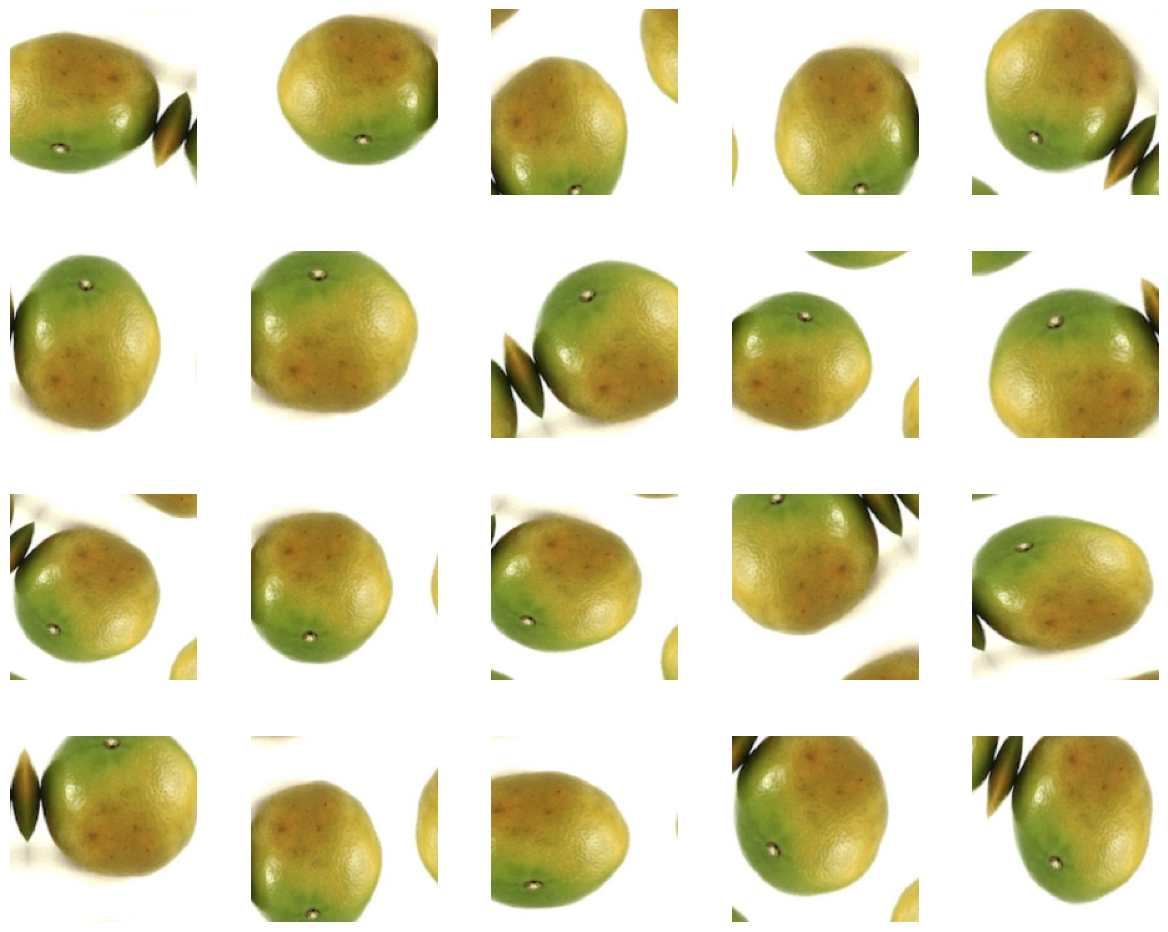

In [14]:
#Use last image for augmentation
path_aug = os.path.join(train_fresh_dir, os.listdir(train_fresh_dir)[-1])

img_augmentation = image.load_img(path_aug)
x_aug = image.img_to_array(img_augmentation)
x_aug = x_aug.reshape((1,) + x_aug.shape)



train_datagen = ImageDataGenerator(
    rescale=1./255,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=[0.8, 1.1],
    rotation_range=40,
    horizontal_flip=True,
    vertical_flip=True,
    fill_mode='reflect'
)

validation_datagen = ImageDataGenerator(
    rescale=1./255
)

# Create augmented images
i = 0
for batch in train_datagen.flow(x_aug, batch_size=1, save_to_dir=preview_dir, save_prefix='fruit', save_format='jpeg'):
    i += 1
    if i >= 20:
        break

preview_img = os.listdir(preview_dir)
grid_size = int(np.ceil(np.sqrt(len(preview_img))))

plt.figure(figsize=(15, 15))
for n in range(len(preview_img)):
    plt.subplot(grid_size, grid_size, n + 1)  # Create a grid of images
    plt.subplots_adjust(hspace=0.3)
    plt.imshow(image.load_img(os.path.join(preview_dir, preview_img[n]),
                              color_mode="rgb",
                              target_size=(150, 150),
                              interpolation="nearest"))
    plt.axis('off')
plt.show()

for fn in preview_img:
  os.system(f'rm {os.path.join(preview_dir, fn)}')


## Image Data Generator

In [15]:
train_generator = train_datagen.flow_from_directory(train_dir,
                                                    target_size=TARGET_SIZE,
                                                    batch_size=BATCH_SIZE,
                                                    color_mode=COLOR_MODE,
                                                    class_mode='binary')

validation_generator = train_datagen.flow_from_directory(validation_dir,
                                                         target_size=TARGET_SIZE,
                                                         batch_size=BATCH_SIZE,
                                                         color_mode=COLOR_MODE,
                                                         class_mode='binary')

Found 16570 images belonging to 2 classes.
Found 8319 images belonging to 2 classes.


## Callbacks

In [16]:
class MyCallback(tf.keras.callbacks.Callback):
    def __init__(self, accuracy_threshold=0.98, monitor='accuracy'):
        super(MyCallback, self).__init__()
        self.accuracy_threshold = accuracy_threshold
        self.monitor = monitor

    def on_epoch_end(self, epoch, logs=None):
        logs = logs or {}
        monitored_metric = logs.get(self.monitor)
        if monitored_metric is not None and monitored_metric >= self.accuracy_threshold:
            print(f"\nEpoch {epoch + 1}: {self.monitor} reached {monitored_metric:.2%}. Stopping training.")
            self.model.stop_training = True


callbacks = MyCallback(accuracy_threshold=0.98, monitor='val_accuracy')  


## Transfer Learning

In [17]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras import layers
from tensorflow.keras import Model
from tensorflow.keras import regularizers
import pandas as pd


pre_trained_model = VGG16(input_shape=(150, 150, 3), include_top=False, weights='imagenet')


for layer in pre_trained_model.layers[:-4]:
    layer.trainable = False


x = layers.Flatten()(pre_trained_model.output)
x = layers.Dense(512, activation='relu', kernel_regularizer=regularizers.l2(0.0001))(x)
x = layers.BatchNormalization()(x)
x = layers.Dropout(0.3)(x)
x = layers.Dense(256, activation='relu', kernel_regularizer=regularizers.l2(0.0001))(x)
x = layers.BatchNormalization()(x)
x = layers.Dropout(0.3)(x)
x = layers.Dense(1, activation='sigmoid')(x)


######################### Fully Connected Layer ################################

model = Model(pre_trained_model.input, x)
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.00005),
              loss='binary_crossentropy',
              metrics=['accuracy', tf.keras.metrics.AUC(name='auc')])

pd.set_option('max_colwidth', None)
layers = [(layer, layer.name, layer.trainable) for layer in pre_trained_model.layers]
pd.DataFrame(layers, columns=['Layer Type', 'Layer Name', 'Layer Trainable'])

,Layer Type,Layer Name,Layer Trainable
0,"<InputLayer name=input_layer, built=True>",input_layer,False
1,"<Conv2D name=block1_conv1, built=True>",block1_conv1,False
2,"<Conv2D name=block1_conv2, built=True>",block1_conv2,False
3,"<MaxPooling2D name=block1_pool, built=True>",block1_pool,False
4,"<Conv2D name=block2_conv1, built=True>",block2_conv1,False
5,"<Conv2D name=block2_conv2, built=True>",block2_conv2,False
6,"<MaxPooling2D name=block2_pool, built=True>",block2_pool,False
7,"<Conv2D name=block3_conv1, built=True>",block3_conv1,False
8,"<Conv2D name=block3_conv2, built=True>",block3_conv2,False
9,"<Conv2D name=block3_conv3, built=True>",block3_conv3,False


In [18]:
train_len = 0
for foldername in os.listdir('tmp/fruit-dataset/train'):
    train_len = train_len + len(os.listdir(os.path.join('tmp/fruit-dataset/train',foldername)))

val_len = 0
for foldername in os.listdir('tmp/fruit-dataset/val'):
    val_len = val_len + len(os.listdir(os.path.join('tmp/fruit-dataset/val',foldername)))

print(train_len)
print(val_len)

16570
8319


In [19]:

history = model.fit(
    train_generator,
    steps_per_epoch=int(train_len/32),
    epochs=3,
    verbose=1,
    callbacks=[callbacks],
    validation_data=validation_generator,
    validation_steps=int(val_len/32)
)

c:\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/3
517/517 ━━━━━━━━━━━━━━━━━━━━ 935s 2s/step - accuracy: 0.7803 - auc: 0.8613 - loss: 0.6025 - val_accuracy: 0.9178 - val_auc: 0.9755 - val_loss: 0.3273
Epoch 2/3
  1/517 ━━━━━━━━━━━━━━━━━━━━ 9:08 1s/step - accuracy: 0.9062 - auc: 0.9534 - loss: 0.4040

c:\Python312\Lib\site-packages\keras\src\trainers\epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


517/517 ━━━━━━━━━━━━━━━━━━━━ 247s 476ms/step - accuracy: 0.9062 - auc: 0.9534 - loss: 0.4040 - val_accuracy: 0.9182 - val_auc: 0.9736 - val_loss: 0.3329
Epoch 3/3
517/517 ━━━━━━━━━━━━━━━━━━━━ 876s 2s/step - accuracy: 0.9079 - auc: 0.9694 - loss: 0.3451 - val_accuracy: 0.9449 - val_auc: 0.9881 - val_loss: 0.2542


## Plot Loss and Accuracy

<Figure size 640x480 with 0 Axes>

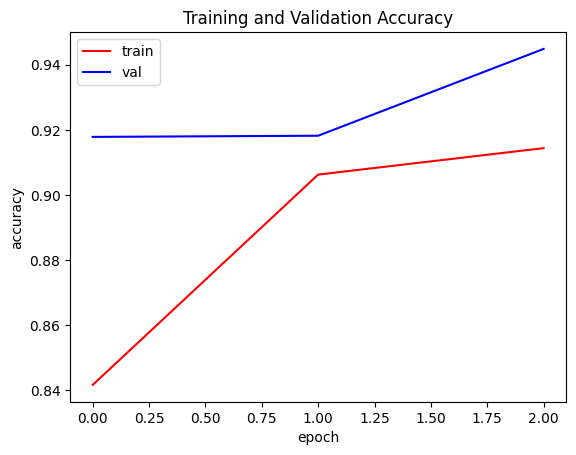

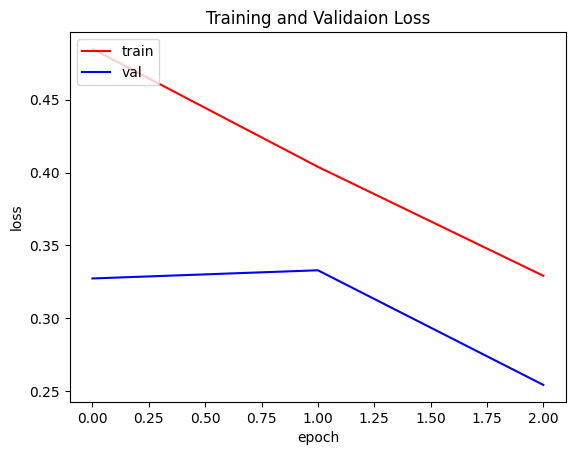

<Figure size 640x480 with 0 Axes>

In [20]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r')
plt.plot(epochs, val_acc, 'b')
plt.title('Training and Validation Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.figure()

plt.plot(epochs, loss, 'r')
plt.plot(epochs, val_loss, 'b')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.title('Training and Validaion Loss')
plt.figure()

## Evaluate Model

In [21]:
test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(test_dir,
                                                  batch_size=1,
                                                  target_size=(150, 150),
                                                  shuffle = False,
                                                  class_mode='binary')

filenames = test_generator.filenames
nb_samples = len(filenames)

results = model.evaluate(test_generator, steps=nb_samples, verbose=1)

loss = results[0]
acc = results[1] 
print('accuracy test: ',acc)
print('loss test: ',loss)

Found 6738 images belonging to 2 classes.
6738/6738 ━━━━━━━━━━━━━━━━━━━━ 504s 75ms/step - accuracy: 0.9566 - auc: 0.5135 - loss: 0.2246
accuracy test:  0.9480558037757874
loss test:  0.24869129061698914


In [22]:
model.save_weights('model2.h5')